In [54]:
import numpy as np
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from datetime import datetime
from heapq import nlargest


sid = SentimentIntensityAnalyzer()
lemma = WordNetLemmatizer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/k1anders/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /home/k1anders/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/k1anders/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/k1anders/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/k1anders/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [55]:
def get_sentiment(filepath):
    df = pd.read_csv(filepath)
    
    df["full_text"] = df["title"] + " " + df["selftext"]
    df["sent_score"] = df["full_text"].apply(lambda review: sid.polarity_scores(review))
    df["compound"] = df["sent_score"].apply(lambda score_dict: score_dict["compound"])
    df["sentiment"] = df["compound"].apply(lambda c: "pos" if c > 0 else ("neu" if c == 0 else "neg"))
    df['year'] = df['created_utc'].str[:4]
    
    return df

# ***Private Universities***

In [56]:

georgetown = get_sentiment("data/private/georgetown/georgetown_all_time.csv")
brown = get_sentiment("data/private/BrownU/BrownU_all_time.csv")
harvard = get_sentiment("data/private/Harvard/Harvard_all_time.csv")
upenn = get_sentiment("data/private/UPenn/UPenn_all_time.csv")
usc = get_sentiment("data/private/USC/USC_all_time.csv")
syracuse = get_sentiment("data/private/Syracuse/Syracuse_all_time.csv")
columbia = get_sentiment("data/private/columbia/columbia_all_time.csv")
mit = get_sentiment("data/private/mit/mit_all_time.csv")
notredame = get_sentiment("data/private/notredame/notredame_all_time.csv")
stanford = get_sentiment("data/private/stanford/stanford_all_time.csv")
yale = get_sentiment("data/private/yale/yale_all_time.csv")
bostonU = get_sentiment("data/private/BostonU/BostonU_all_time.csv")
#brown = get_sentiment("data/private/BrownU/BrownU_all_time.csv")

In [49]:
#my attempt to combine it all, kind broke down my computer for a bit
#private = [georgetown, brown, harvard, upenn, usc, syracuse, columbia, mit, notredame, stanford, yale, bostonU]
#df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['sentiment'], how='outer'), private)

In [77]:
#palette ={"pos": "#009E73", "neu": "#F0E442", "neg": "#D55E00"} # change colors to colorblind friendly hex colors

def count_sentiment_private (df):
    sns.countplot (x = 'sentiment', data = df)
    return df
#not sure what graph to do, we could also do stripplot?
def overall_change_per_school(df):
    df['year'] = df['created_utc'].str[:4]
    
    name =[x for x in globals() if globals()[x] is df][0]
    
    
    sns.set_theme(style="whitegrid")
    sns.catplot(x = 'year', y = 'compound', data = df, kind = "box").set(title=name)
    
    return df

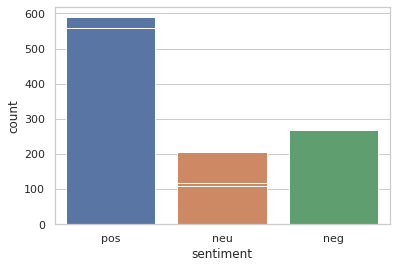

In [78]:
count_georgetown = count_sentiment_private (georgetown)
count_brown = count_sentiment_private (brown)
count_harvard = count_sentiment_private (harvard)
count_upenn = count_sentiment_private (upenn)
count_usc = count_sentiment_private (usc)
count_syracuse = count_sentiment_private (syracuse)
count_columbia = count_sentiment_private (columbia)
count_mit = count_sentiment_private (mit)
count_notredame = count_sentiment_private (notredame)
count_stanford = count_sentiment_private (stanford)
count_yale = count_sentiment_private (yale)
count_bostonU = count_sentiment_private (bostonU)


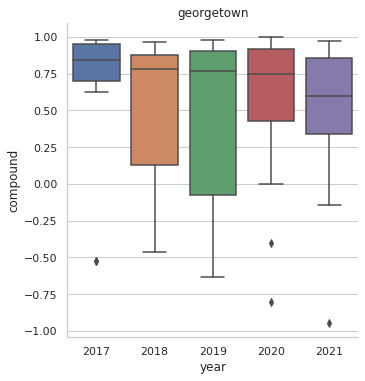

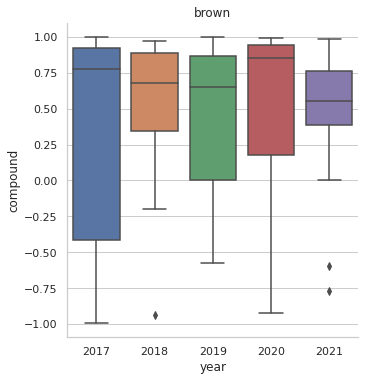

In [27]:
overall_georgetown = overall_change_per_school (georgetown)
overall_brown = overall_change_per_school (brown)
overall_harvard = overall_change_per_school (harvard)
overall_upenn = overall_change_per_school (upenn)
overall_usc = overall_change_per_school (usc)
overall_syracuse = overall_change_per_school (syracuse)
overall_columbia = overall_change_per_school (columbia)
overall_mit = overall_change_per_school (mit)
overall_notredame = overall_change_per_school (notredame)
overall_stanford = overall_change_per_school (stanford)
overall_yale = overall_change_per_school (yale)
overall_bostonU = overall_change_per_school (bostonU)
#separated by college bc doing it all in one was way too much

In [14]:
private_df = pd.concat([georgetown, brown, harvard, upenn, usc, syracuse, columbia, mit, notredame, stanford, yale, bostonU])


NameError: name 'georgetown' is not defined

In [80]:
def overall_change(df):    
    df['year'] = df['created_utc'].str[:4]
    sns.set_theme(style="whitegrid")  
    sns.boxplot(x = 'year', y = 'compound', data = df)
    sns.lineplot(x='year', y='compound', data=df, marker="o" ,color ='black')
    return df

In [81]:
def overall_change_month(df): 
    
    df['month'] = df['created_utc'].str[5:7]
    df.loc[df["month"] == "01", "month"] = 'Jan'
    df.loc[df["month"] == "02", "month"] = 'Feb'
    df.loc[df["month"] == "03", "month"] = 'Mar'
    df.loc[df["month"] == "04", "month"] = 'Apr'
    df.loc[df["month"] == "05", "month"] = 'May'
    df.loc[df["month"] == "06", "month"] = 'June'
    df.loc[df["month"] == "07", "month"] = 'July'
    df.loc[df["month"] == "08", "month"] = 'Aug'
    df.loc[df["month"] == "09", "month"] = 'Sept'
    df.loc[df["month"] == "10", "month"] = 'Oct'
    df.loc[df["month"] == "11", "month"] = 'Nov'
    df.loc[df["month"] == "12", "month"] = 'Dec'

    sns.set_theme(style="whitegrid")  
    sns.boxplot(x = 'month', y = 'compound', data = df, order = ["Jan", "Feb", "Mar","Apr","May","June","July","Aug","Sept", "Oct", "Nov","Dec"])
    sns.lineplot(x= 'month', y='compound', data=df, marker="o" ,color ='black')
    return df


Text(0.5, 1.0, 'Private Universities')

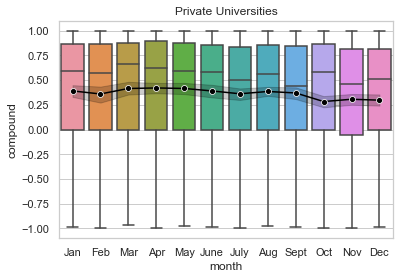

In [82]:
overall_private_month = overall_change_month(private_df)
plt.title('Private Universities')

Text(0.5, 1.0, 'Private Universities')

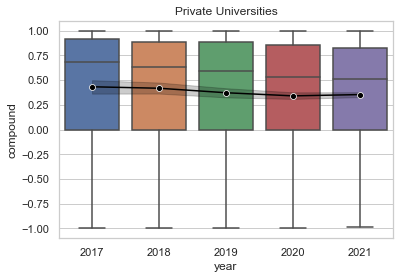

In [83]:
overall_private = overall_change(private_df)
plt.title('Private Universities')

### Results -- Explanation?

This graph looks at a concated dataset of all the private school datasets to give us what a private school category looks like. When looking just at the mean, we can see that there isn't a significant change of sentiment every year, however it does go slightly down over time betwwen .75 - .50 . 

# ***Public Universities***

In [66]:
fsu = get_sentiment('data/public/FSU/FSU_all_time.csv')
pennstate = get_sentiment('data/public/PennStateUniversity/PennStateUniversity_all_time.csv')
ucdavis = get_sentiment('data/public/UCDavis/UCDavis_all_time.csv')
uci = get_sentiment('data/public/UCI/UCI_all_time.csv')
ucsc = get_sentiment('data/public/UCSC/UCSC_all_time.csv')
ucsd = get_sentiment('data/public/UCSD/UCSD_all_time.csv')
ucsb = get_sentiment('data/public/UCSantaBarbara/UCSantaBarbara_all_time.csv')
utaustin = get_sentiment('data/public/UTAustin/UTAustin_all_time.csv')
gatech = get_sentiment('data/public/gatech/gatech_all_time.csv')
ucla = get_sentiment('data/public/ucla/ucla_all_time.csv')
udub = get_sentiment('data/public/udub/udub_all_time.csv')
uofm = get_sentiment('data/public/uofm/uofm_all_time.csv')
public_df = pd.concat([fsu,pennstate,ucdavis,uci,ucsc,ucsd,ucsb,utaustin,gatech,ucla,udub,uofm])


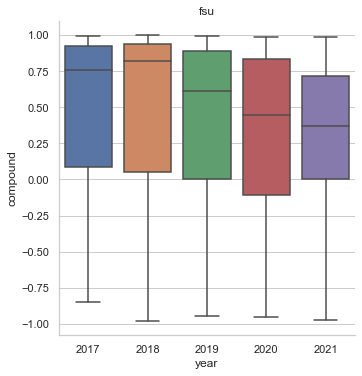

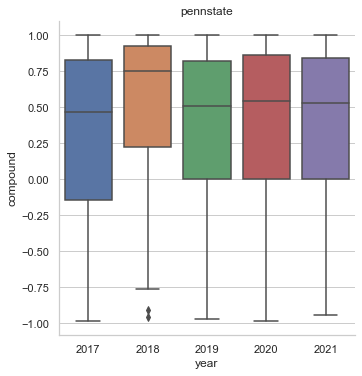

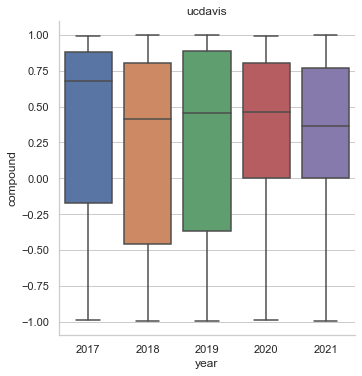

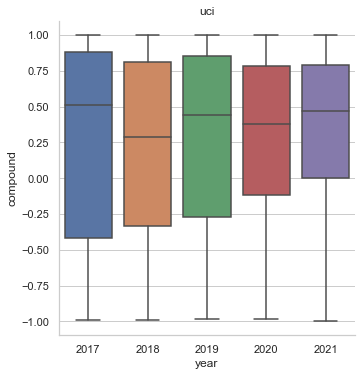

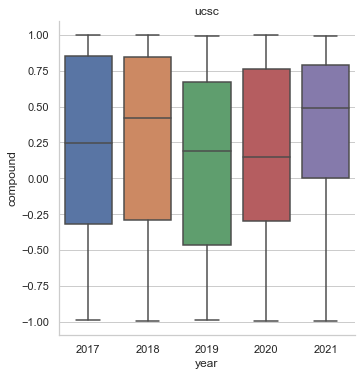

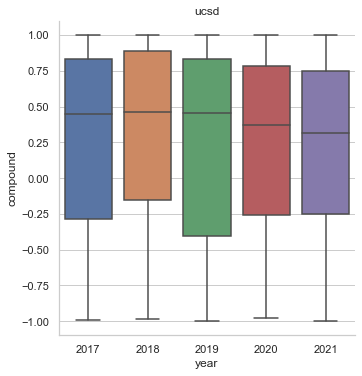

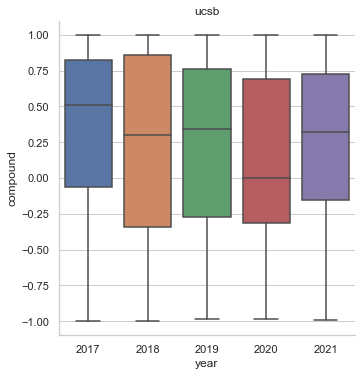

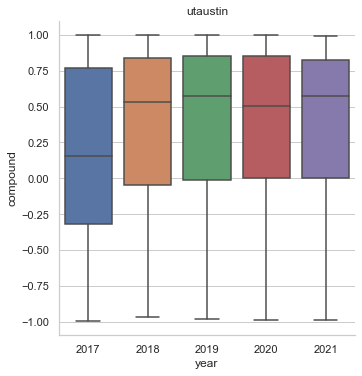

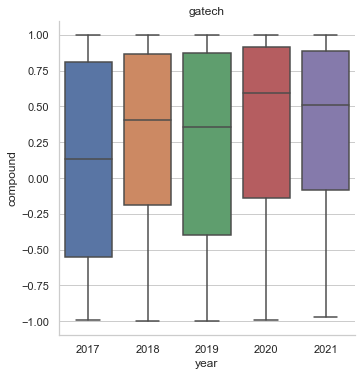

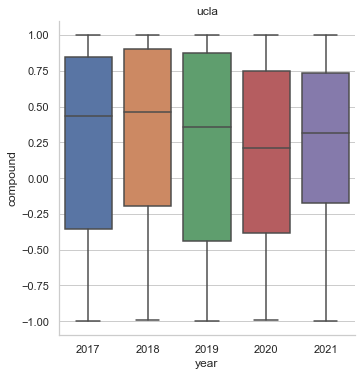

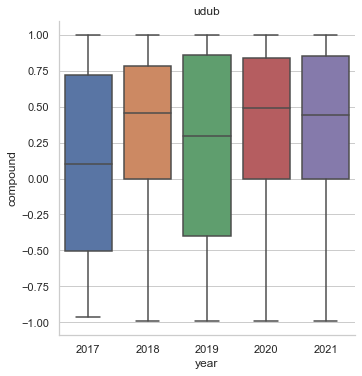

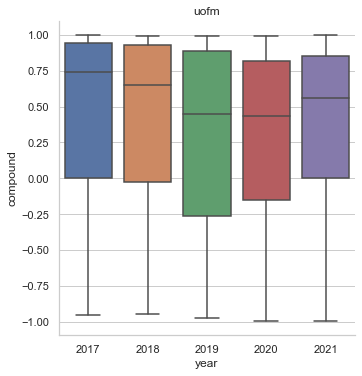

In [67]:
overall_fsu = overall_change_per_school (fsu)
overall_pennstate = overall_change_per_school (pennstate)
overall_ucdavis = overall_change_per_school (ucdavis)
overall_uci = overall_change_per_school (uci)
overall_ucsc = overall_change_per_school (ucsc)
overall_ucsd = overall_change_per_school (ucsd)
overall_ucsb = overall_change_per_school (ucsb)
overall_utaustin = overall_change_per_school (utaustin)
overall_gatech = overall_change_per_school (gatech)
overall_ucla = overall_change_per_school (ucla)
overall_udub = overall_change_per_school (udub)
overall_uofm = overall_change_per_school (uofm)

Text(0.5, 1.0, 'Public Universities')

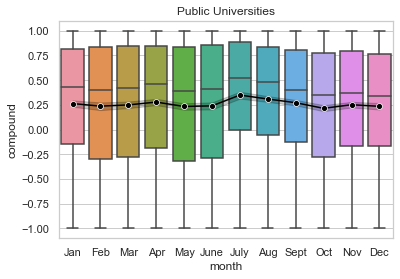

In [68]:
overall_public_month = overall_change_month(public_df)
plt.title('Public Universities')

Text(0.5, 1.0, 'Public Universities')

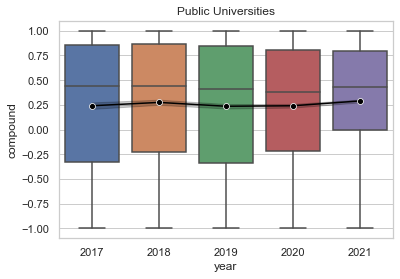

In [69]:
overall_public = overall_change(public_df)
plt.title('Public Universities')

### Results -- Explanation?

This graph looks at a concated dataset of all the public school datasets to give us what a public school category, in general, looks like. When looking just at the mean, we can see that there isn't a significant change of sentiment every year, in fact there is no trend with the mean averaging about a compound score between .25 - .50 which means slightly positive. 